# GOOD FAST CHEAP - 20 Feature Constraint - Data Cleaning

---

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

## Read Data

In [2]:
# Read the data
df = pd.read_csv('../data/large_train_sample.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


In [4]:
# Check shape
df.shape

(32561, 14)

In [5]:
# Rename columns
df.columns = ['age', 'workclass', 'final_weight', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'wage']

In [6]:
df.dtypes

age                int64
workclass         object
final_weight       int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
wage              object
dtype: object

In [7]:
# Numerical columns
num_cols = list(df._get_numeric_data().columns)
num_cols

['age',
 'final_weight',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [8]:
# Categorical columns
cat_cols = list(set(df.columns) - set(num_cols))
cat_cols

['native_country',
 'education',
 'relationship',
 'workclass',
 'sex',
 'occupation',
 'wage',
 'marital_status']

---

## Clean Training Data

### Cleaning categorical

In [9]:
# Remove white space from categorical columns
for cols in cat_cols:
    df[cols] = df[cols].str.strip()

In [10]:
# Convert target columns to more than >50K to 1 and 0
df['wage'] = df['wage'].map({'>50K':1,'<=50K':0})

In [11]:
df['wage'].value_counts()

0    24720
1     7841
Name: wage, dtype: int64

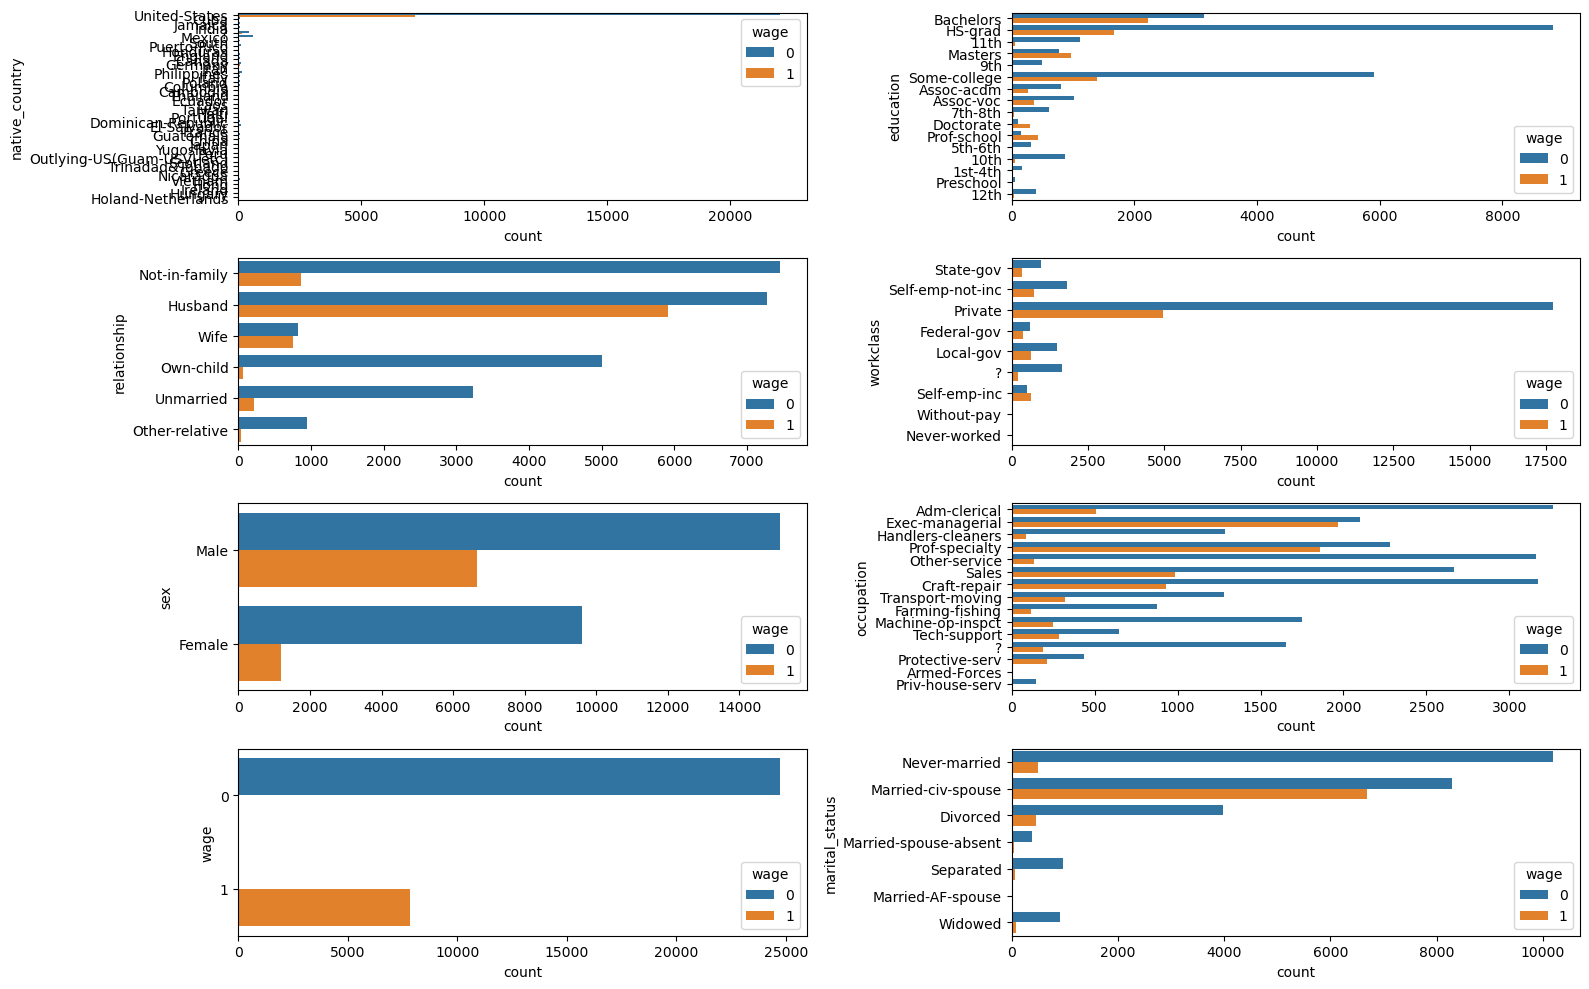

In [12]:
# Plotting a categorical count plot
plt.figure(figsize=(16,10))

for n,cols in enumerate(cat_cols):
    # add subplots
    ax = plt.subplot(4,2, n+1)
    
    sns.countplot(data=df,y=cols,hue='wage');
    
plt.tight_layout()

### Clean categorical as the following:
0. Native Country : US, Other
1. Workclass :
    - Group 1 : Self-emp-inc
    - Group 2 : Federal-gov
    - Group 3 : Local-gov, Self-emp-not-inc, State-gov, Private
2. Occupation :
    - Group 1 : Prof-specialty, Exec-managerial
    - Group 2 : Protective-serv, Tech-support
    - Gorup 3 : Sales, Craft-repair, Transport-moving
    - Other
3. Relationship : Husband & Wife, Other
4. Marital_status : Married-civ-spouse & Married-AF-spouse, Other
5. Education :
    - Group 1 : Doctorate, Prof-school
    - Group 2 : Masters, Bachelors
    - Other
6. Sex : convert to is_male

In [13]:
def cat_cleaning_func(df):
    
    # Native Country
    df['native_country'].where(df['native_country']=='United-States',
                               other = 'Other',inplace=True)
    # Workclass
    df['workclass'] = df['workclass'].map({'Self-emp-inc':'Group1',
                                           'Federal-gov':'Group2',
                                           'Local-gov':'Group3',
                                           'Self-emp-not-inc':'Group3',
                                           'State-gov':'Group3',
                                           'Private':'Group3'}).fillna('Other')
    
    # Occupation
    df['occupation'] = df['occupation'].map({'Prof-specialty':'Group1',
                                             'Exec-managerial':'Group1',
                                             'Protective-serv':'Group2',
                                             'Tech-support':'Group2',
                                             'Sales':'Group3',
                                             'Craft-repair':'Group3',
                                             'Transport-moving':'Group3'})\
    .fillna('Other')
    
    # Workclass
    df['workclass'] = df['workclass'].map({'Self-emp-inc':'Group1',
                                           'Federal-gov':'Group2',
                                           'Local-gov':'Group3',
                                           'Self-emp-not-inc':'Group3',
                                           'State-gov':'Group3',
                                           'Private':'Group3'}).fillna('Other')
    
    # Relationship
    df['relationship'] = df['relationship'].map({'Husband':1,'Wife':1,
                                                 'Not-in-family':2})\
    .fillna('Other')
    
    # Marital status
    df['marital_status'] = df['marital_status'].map({'Married-civ-spouse':1,
                                                     'Married-AF-spouse':1})\
    .fillna('Other')
    
    # Education
    df['education'] = df['education'].map({'Doctorate':'Group1',
                                           'Prof-school':'Group1',
                                           'Masters':'Group2',
                                           'Bachlors':'Group2'})\
    .fillna('Other')
    
    # Convert male to 1 female to 0
    df['is_male'] = df['sex'].map({'Male':1,'Female':0})
    
    # Drop sex
    df.drop(columns=['sex'],inplace=True)
    
    return df

In [14]:
# Apply cleaning function
df = cat_cleaning_func(df)

In [15]:
# Update cat_cols
updated_cat_cols = list(set(df.columns) - set(num_cols))

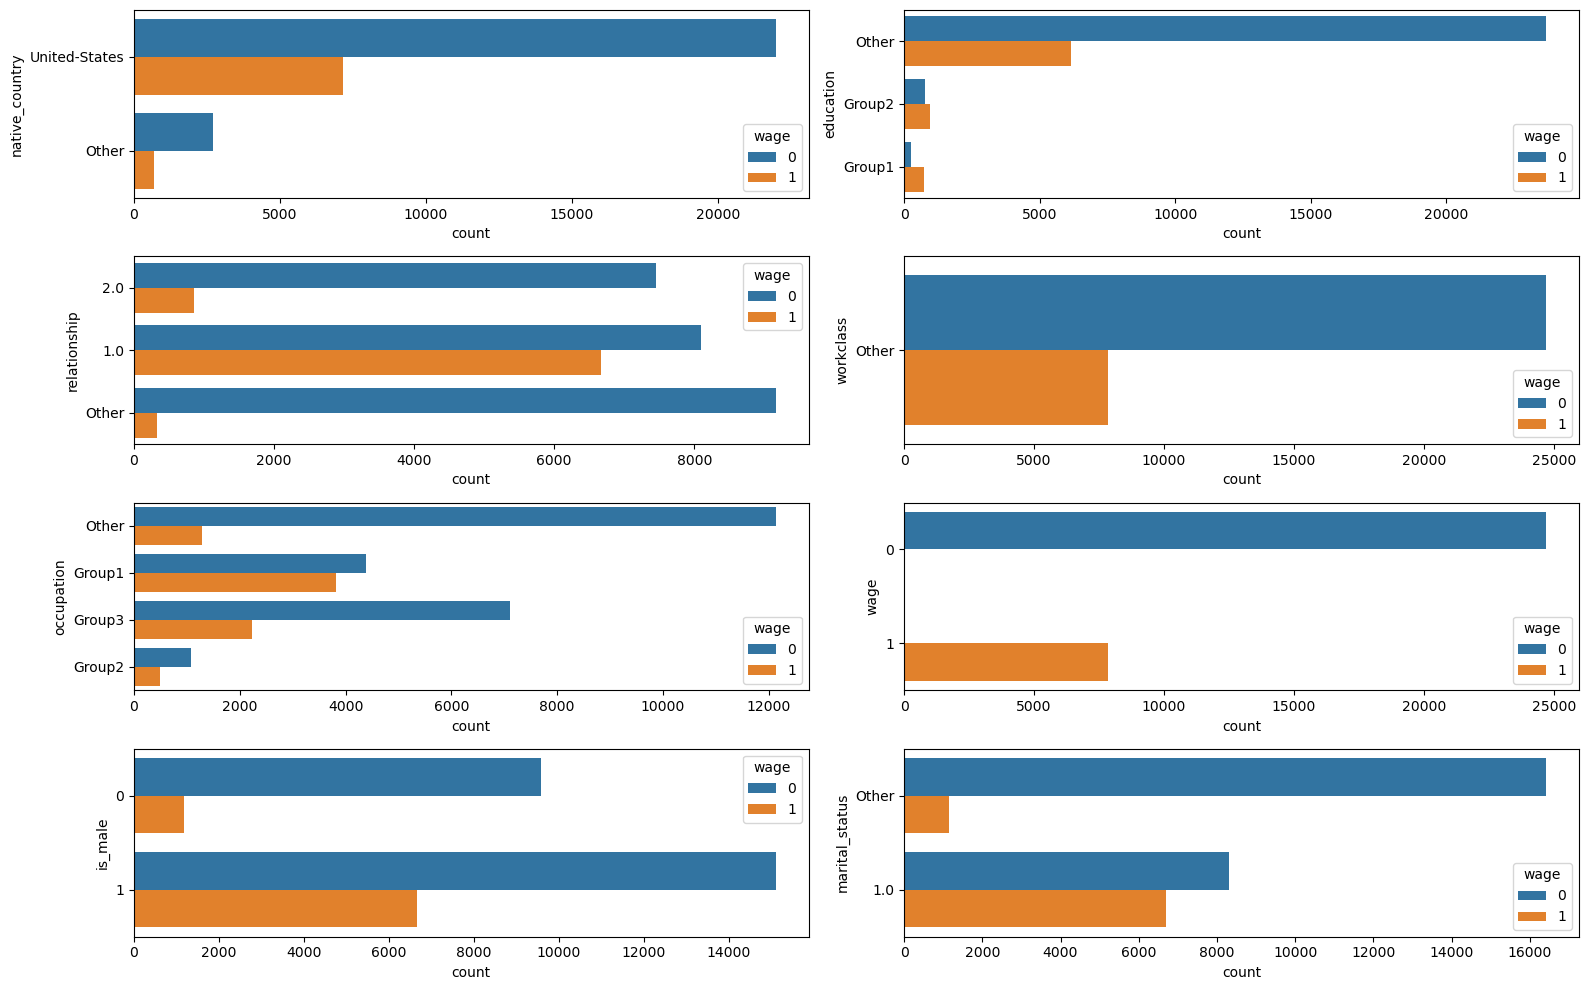

In [16]:
# Plotting a categorical count plot
plt.figure(figsize=(16,10))

for n,cols in enumerate(updated_cat_cols):
    # add subplots
    ax = plt.subplot(4,2, n+1)
    
    sns.countplot(data=df,y=cols,hue='wage');
    
plt.tight_layout()

---

### Cleaning numerical columns

In [17]:
# Add wage to consider
num_cols.extend(['wage'])

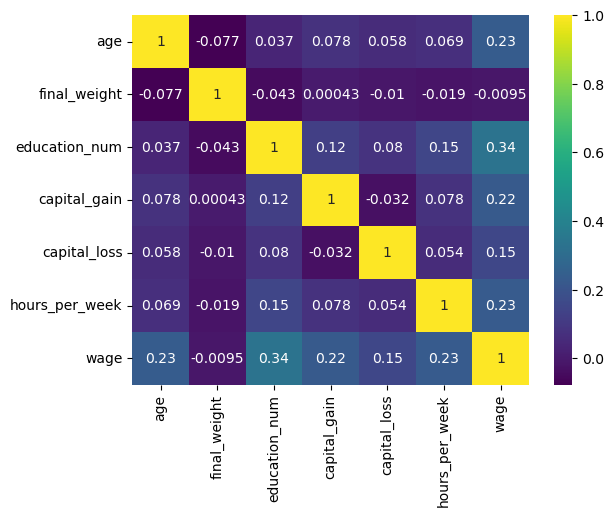

In [18]:
sns.heatmap(df[num_cols].corr(),annot=True, cmap = 'viridis');

In [19]:
# We will drop final_weight
df.drop(columns = ['final_weight'],inplace=True)

In [20]:
# Check final data
df.head(2)

,age,workclass,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,wage,is_male
0,39,Other,Other,13,Other,Other,2.0,2174,0,40,United-States,0,1
1,50,Other,Other,13,1.0,Group1,1.0,0,0,13,United-States,0,1


---

## Clean test data

In [21]:
test = pd.read_csv('../data/test_data.csv')

In [22]:
test.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,Male,0,0,50,United-States


In [23]:
# Rename columns
test.columns = ['age', 'workclass', 'final_weight', 'education',
                'education_num','marital_status', 'occupation', 'relationship',
                'sex', 'capital_gain','capital_loss', 'hours_per_week',
                'native_country']

In [24]:
# Remove white space - try except to pass the wage column in cat_cols
for cols in cat_cols:
    try:
        test[cols] = test[cols].str.strip()
    except:
        pass

In [25]:
test = cat_cleaning_func(test)

In [26]:
test.drop(columns = ['final_weight'],inplace=True)

In [27]:
test.head(2)

,age,workclass,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,is_male
0,25,Other,Other,7,Other,Other,Other,0,0,40,United-States,1
1,38,Other,Other,9,1.0,Other,1.0,0,0,50,United-States,1


---

## Save the cleaned data


In [28]:
df.to_csv('../data/train_cleaned.csv')
test.to_csv('../data/test_cleaned.csv')